In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/14_DT/Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:xlabel='Work_Experience', ylabel='Density'>

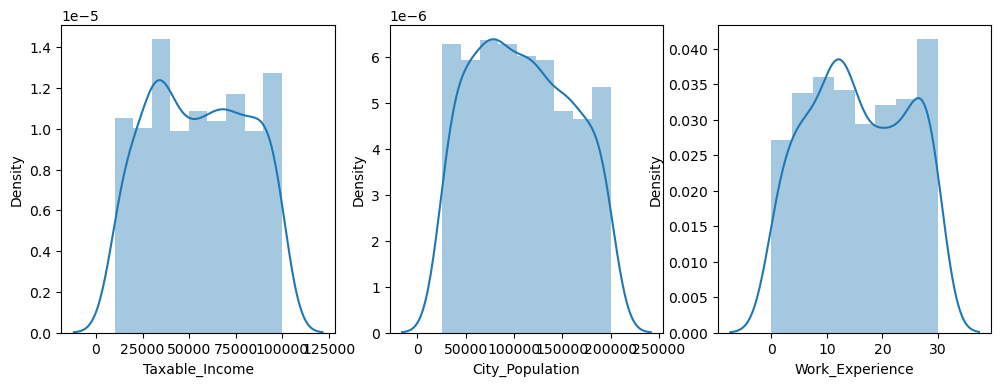

In [20]:
fig,axs=plt.subplots(1,3,figsize=(12,4))
sns.distplot(data.Taxable_Income, ax=axs[0])
sns.distplot(data.City_Population,ax=axs[1])
sns.distplot(data.Work_Experience,ax=axs[2])

Text(0.5, 1.0, 'Work_Experience')

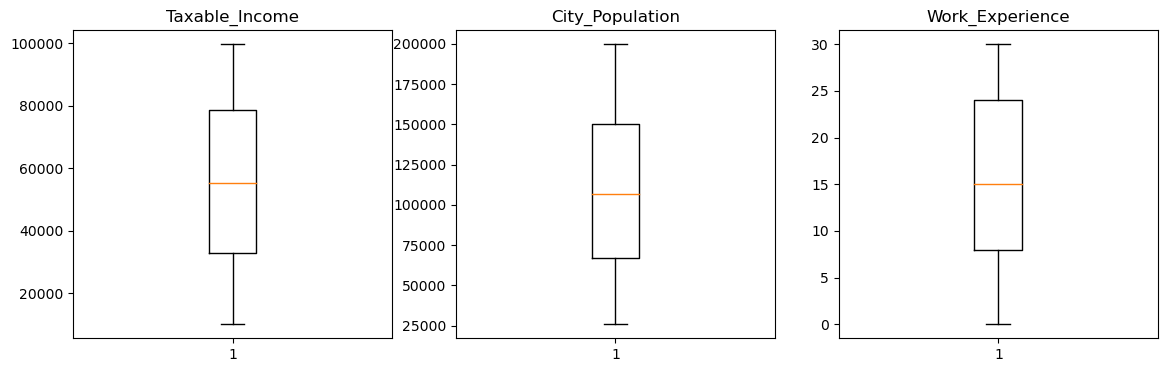

In [24]:
fig,axs=plt.subplots(1,3,figsize=(14,4))
axs[0].boxplot(data.Taxable_Income)
axs[1].boxplot(data.City_Population)
axs[2].boxplot(data.Work_Experience)

axs[0].set_title("Taxable_Income")
axs[1].set_title("City_Population")
axs[2].set_title("Work_Experience")


In [25]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [26]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [27]:
def ROC_AUC(y_test,y_pred_prob):
    classes = "0 vs 1"

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

In [30]:
data['Taxable_Income_N']='good'
data.loc[data['Taxable_Income']<=30000,'Taxable_Income_N']='risky'
dataset=data.drop(['Taxable_Income'],axis=1)

label_encoder = preprocessing.LabelEncoder()
dataset['Undergrad']= label_encoder.fit_transform(dataset['Undergrad'])
dataset['Marital_Status']= label_encoder.fit_transform(dataset['Marital_Status'])
dataset['Urban']= label_encoder.fit_transform(dataset['Urban'])
dataset['Taxable_Income_N']= label_encoder.fit_transform(dataset['Taxable_Income_N'])

dataset.head()


,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_N
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Accuracy of decision tree classifier on training set: 0.8000
Accuracy of decision tree classifier on test set: 0.7833


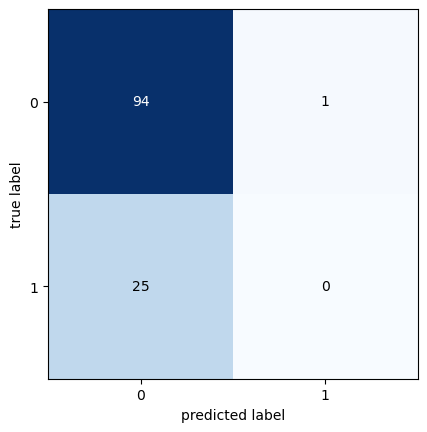


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.39
Macro Recall: 0.49
Macro F1-score: 0.44

Weighted Precision: 0.63
Weighted Recall: 0.78
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



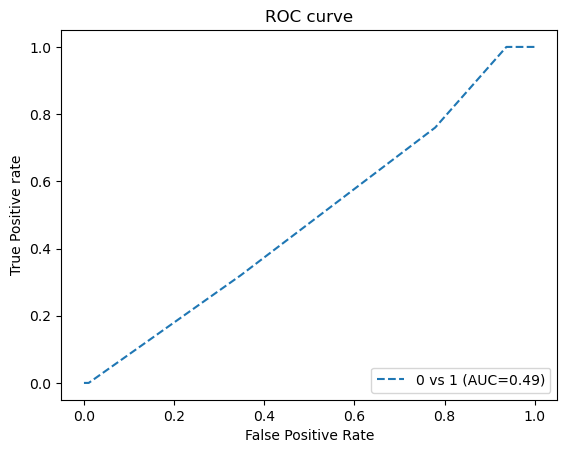

AUC_Score:  0.4890526315789474


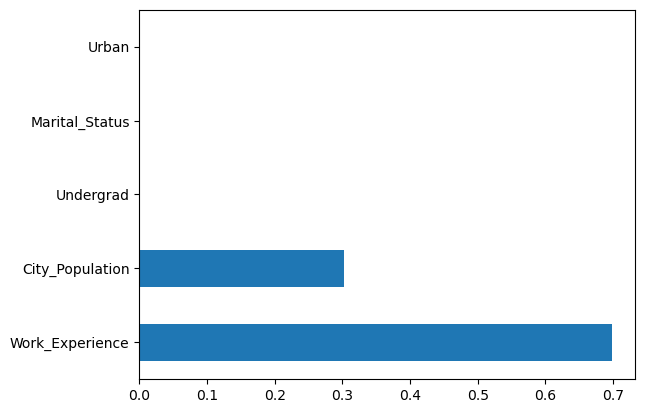

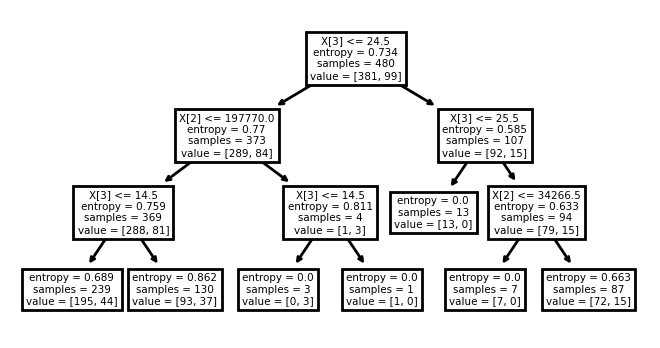

In [40]:
def model(dataset): 
    X=dataset.iloc[:,:-1]# independant variables
    y = dataset.iloc[:,-1] #dependant variable
   
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    
    clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
    clf.fit(X_train,y_train)
    print('Accuracy of decision tree classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of decision tree classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
    y_pred_prob=clf.predict_proba(X_test)
        
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)
    
    fn = [i for i in dataset.columns if i != "Taxable_Income_N"]
    (pd.Series(clf.feature_importances_, index=fn)
    .nlargest(9)
    .plot(kind='barh'))
    plt.show()
    
    ##decision tree
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=200)
    tree.plot_tree(clf)
    
    
    
model(dataset)


Accuracy of decision tree classifier on training set: 0.8000
Accuracy of decision tree classifier on test set: 0.7833


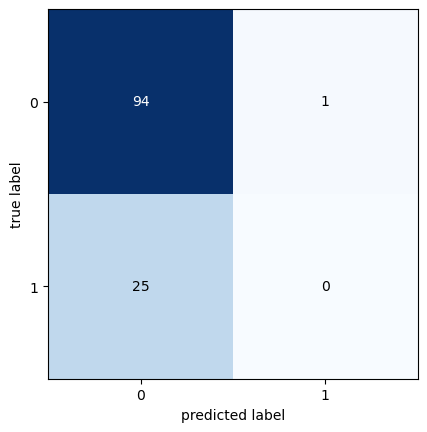


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.39
Macro Recall: 0.49
Macro F1-score: 0.44

Weighted Precision: 0.63
Weighted Recall: 0.78
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



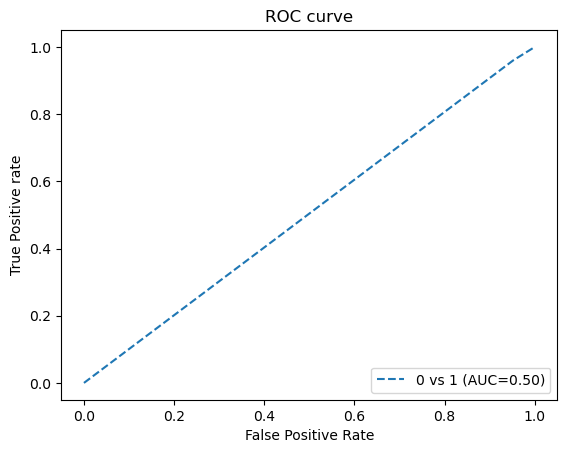

AUC_Score:  0.5039983735429656


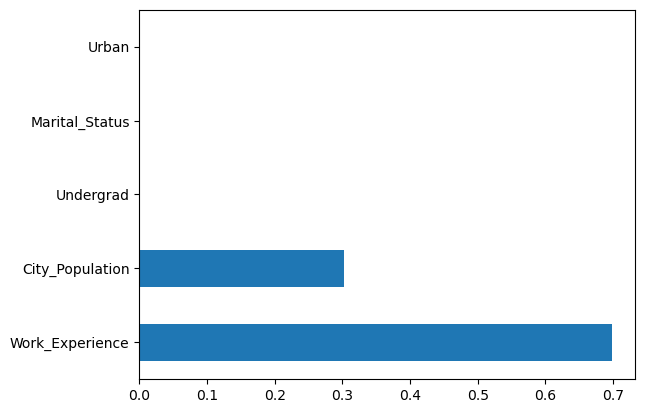

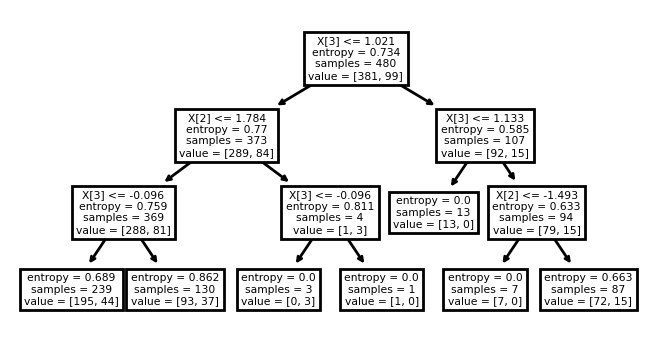

In [39]:
def model_scaling(dataset):
    X=dataset.iloc[:,:-1]# independant variables
    y = dataset.iloc[:,-1] #dependant variable
    
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
      
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    clf= DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
    clf.fit(X_train, y_train)
    print('Accuracy of decision tree classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of decision tree classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X)

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y,y_pred_prob)
    
    fn = [i for i in dataset.columns if i != "Taxable_Income_N"]
    (pd.Series(clf.feature_importances_, index=fn)
    .nlargest(9)
    .plot(kind='barh'))
    plt.show()
    
    ##decision tree
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=200)
    tree.plot_tree(clf)
    
    
model_scaling(dataset)

In [38]:
##Hypertuning parameters
#List Hyperparameters that we want to tune.
X=dataset.iloc[:,:-1]# independant variables
y = dataset.iloc[:,-1] #dependant variable

#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
max_features  = list(range(1,20))
max_depth  = list(range(1,15))
#Convert to dictionary
hyperparameters = dict(max_features=max_features, max_depth=max_depth)
#Create new KNN object
dt = DecisionTreeClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV
##cv is k fold cross validation with 10 folds
clf = GridSearchCV(dt, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_,"best score",best_model.best_score_)



{'max_depth': 1, 'max_features': 1} best score 0.79375


## After hypertuning the model is giving best accuracy. Hence this model can be used for fraud check and work experiance is important feature in this model.
